## PAW wavelet clustering

In [35]:
prefix = '/home/ines/repositories/'
# prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [36]:
""" 
IMPORTS
"""
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import numpy as np
import pandas as pd
from one.api import ONE
from matplotlib import pyplot as plt
from scipy import stats
from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sns

# Get my functions
from functions import idxs_from_files

one = ONE(mode='remote')

In [37]:
""" 
LOAD DATA AND PARAMETERS
"""
# LOAD DATA

data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/extra_bwm/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/extra_bwm/'
velocity = True
path = prefix + 'representation_learning_variability/paper-individuality/0_pre-processing/'
# path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
var = 'paw'

if var == 'paw':
    super_session = np.load(path+'supersession_wavelets_paw09-12-2025')
    # super_session = np.load(path+'supersession_wavelets_paw09-11-2025')
    # super_session = np.load(path+'supersession_wavelets_paw02-12-2026')  # z-scoring across pop
    wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/extra_bwm/'
    states_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_most_likely_states/'

elif var == 'wheel':
    super_session = np.load(path+'supersession_wavelets_wheel09-25-2025')
    wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_wavelets/extra_bwm/'
    states_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_most_likely_states/'



In [38]:
paws = ['l_paw',  'r_paw']

if var == 'paw':
    var_init = ['l_paw_x', 'l_paw_y', 'r_paw_x', 'r_paw_y', 
                    'l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 'l_paw_x16.0', 'l_paw_x32.0',
                    'l_paw_y0.5', 'l_paw_y1.0', 'l_paw_y2.0', 'l_paw_y4.0', 'l_paw_y8.0', 'l_paw_y16.0', 'l_paw_y32.0',
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0', 'r_paw_x16.0', 'r_paw_x32.0',
                    'r_paw_y0.5', 'r_paw_y1.0', 'r_paw_y2.0', 'r_paw_y4.0', 'r_paw_y8.0', 'r_paw_y16.0', 'r_paw_y32.0']
    var_interest = var_init[4:]
    var_interest = ['l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 
                    'l_paw_y0.5', 'l_paw_y1.0', 'l_paw_y2.0', 'l_paw_y4.0', 'l_paw_y8.0', 
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0', 
                    'r_paw_y0.5', 'r_paw_y1.0', 'r_paw_y2.0', 'r_paw_y4.0', 'r_paw_y8.0',]
    var_interest = ['l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 'l_paw_x16.0',
                    'l_paw_y0.5', 'l_paw_y1.0', 'l_paw_y2.0', 'l_paw_y4.0', 'l_paw_y8.0', 'l_paw_y16.0',
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0', 'r_paw_x16.0',
                    'r_paw_y0.5', 'r_paw_y1.0', 'r_paw_y2.0', 'r_paw_y4.0', 'r_paw_y8.0','r_paw_y16.0']
    var_interest = ['l_paw_x0.5','l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0']
    # var_interest = ['l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 
    #                 'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0']
    var_interest = ['l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 
                    'l_paw_y0.5', 'l_paw_y1.0', 'l_paw_y2.0', 'l_paw_y4.0', 'l_paw_y8.0', 
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0', 
                    'r_paw_y0.5', 'r_paw_y1.0', 'r_paw_y2.0', 'r_paw_y4.0', 'r_paw_y8.0',]
elif var == 'wheel':
    var_init = ['avg_wheel_vel0.5', 'avg_wheel_vel1.0', 'avg_wheel_vel2.0', 'avg_wheel_vel4.0', 'avg_wheel_vel8.0', 
                    'avg_wheel_vel16.0', 'avg_wheel_vel32.0',
                    ]
    # var_init = ['avg_wheel_vel0.5', 'avg_wheel_vel1.0', 'avg_wheel_vel2.0', 'avg_wheel_vel4.0', 'avg_wheel_vel8.0', 
    #                 'avg_wheel_vel16.0', 'avg_wheel_vel32.0',
    #                 ]
    var_interest = var_init[:-2]
    # var_interest = var_init

# Wavelet clustering

In [39]:
df = pd.DataFrame(super_session, columns=var_init)
use_vars = var_interest
use_data = np.array(df[var_interest])
zscore = True

if zscore:
    data = np.array(stats.zscore(use_data, axis=0))
else:
    X_centered = use_data - np.mean(use_data, axis=0)
    data = np.array(use_data)

use_data = data.copy()

# Find best k

### Inertia

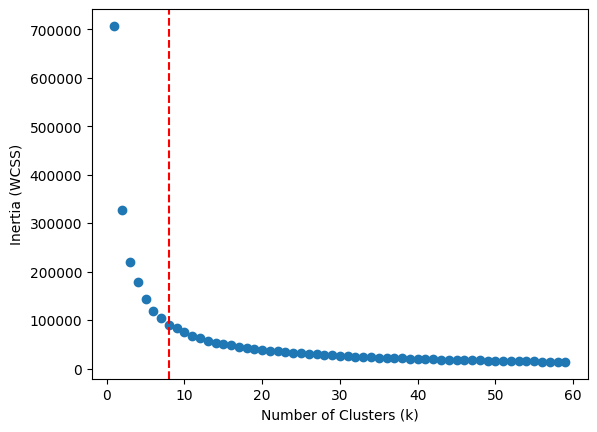

In [17]:

inertia_values = []
K = range(1, 60)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cutoff = int(np.shape(use_data)[0]*0.8)
    X_train = np.vstack([use_data[:cutoff, 0], use_data[:cutoff, 1]]).T
    kmeans.fit(X_train.copy())
    inertia_values.append(kmeans.inertia_)
    
kneedle = KneeLocator(K, inertia_values, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
# Plotting the inertia values
plt.scatter(K, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
# plt.savefig(save_path+'inertia_values_session_part_clusters.svg', format="svg")

plt.show()

In [18]:
print(optimal_k)

8


# kMeans on supersession

In [50]:
# Loop through animals
sessions_to_process = []

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]

    sessions_to_process.append((mouse_name, session))

In [51]:
sessions_to_exclude = ['2d7c0f7f-e805-404b-914a-23d83998e08e', # bad right cam
'7691eeb3-715b-4571-8fda-6bb57aab8253', # bad view of paws
'bd8b204f-a42e-45c1-a8f0-71c6223a6657', # bad right camera
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536', # moving licks
'650a0a90-4bf3-4489-9bcd-75baf0a49eac', # licks fail
'495bee7e-b58e-42ea-8481-4a1bfedca54a', # timestamps
'1db57661-5ad3-4465-b9ee-08473af9c2e8', # timestamps
'6a369bfa-a70b-4147-af25-d03772ff8d96', # timestamps
'7050ae29-a99e-43f1-aa42-b4416200351c', # timestamps
'3fa080ff-bcce-43e8-bd5f-601f0591f785', # timestamps
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b', # bad licks
'c728f6fd-58e2-448d-aefb-a72c637b604c' # no data can be loaded
]

In [52]:
# sessions_to_process = [x for x in sessions_to_process if x not in sessions_to_exclude]

In [44]:
optimal_k = 8

kmeans = KMeans(n_clusters=optimal_k, random_state=2024)
kmeans.fit(use_data.copy())
centroids = kmeans.cluster_centers_
cluster_values = kmeans.predict(use_data)

In [ ]:
if var == 'paw':
    if velocity:
        subname = "paw_vel_wavelets_"
    else:
        subname = "paw_pos_wavelets_"
    state_name = 'paw_states'
elif var == 'wheel':
    subname = 'wheel_vel_wavelets_'
    state_name = 'wheel_states'
    

: 

In [59]:

# assert len(sessions_to_process) == 218
for m, mat in enumerate(sessions_to_process):

    mouse_name = mat[0]
    session = mat[1]
    if session not in sessions_to_exclude:

        filename = wavelet_path + subname + str(session) + '_'  + mouse_name
        design_matrix = pd.read_parquet(filename)

        var_array = np.array(design_matrix[use_vars].copy())
        not_nan = ~np.isnan(var_array).any(axis=1)
        mouse_data = stats.zscore(var_array[not_nan, :], axis=0, nan_policy='omit')
            
        """ Compute clusters based on supersession centroids """
        # Compute distances between full dataset and trained centroids
        distances = cdist(mouse_data, centroids, metric='euclidean')
        # Assign each point to the nearest centroid
        states = np.argmin(distances, axis=1)
        
        design_matrix[state_name] = np.nan
        design_matrix[state_name][not_nan] = states
        
        """ Save paw states on design_matrix """
        # Save most_likely_states
        filename = states_path + "most_likely_states" + '_'+str(optimal_k)+'_'+ str(mouse_name+session)
        states_bin = np.array([states, np.array(design_matrix['Bin'][not_nan])])
        np.save(filename, states_bin)
        # Save most_likely_states
        filename = states_path + "centroid_distances" + '_'+str(optimal_k)+'_'+ str(mouse_name+session)
        np.save(filename, distances)


/tmp/ipykernel_86048/2464085969.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = states
/tmp/ipykernel_86048/2464085969.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

# Visualize cluster statistics

In [45]:
all_data = pd.DataFrame(use_data, columns=use_vars)
kmeans = KMeans(n_clusters=optimal_k, random_state=2024)
kmeans.fit(use_data.copy())
centroids = kmeans.cluster_centers_
all_data[state_name] = kmeans.predict(use_data)
wavelet_df = pd.melt(all_data, id_vars=[state_name], value_vars=use_vars)

In [ ]:
palette = sns.color_palette('Set2', optimal_k, as_cmap=True)

: 

# Wheel wavelets

In [46]:
fix_mapping = {0:1, 1:0, 2:2}

replace_func = np.vectorize(fix_mapping.get)
wavelet_df['new_states'] = replace_func(wavelet_df['wheel_states'])

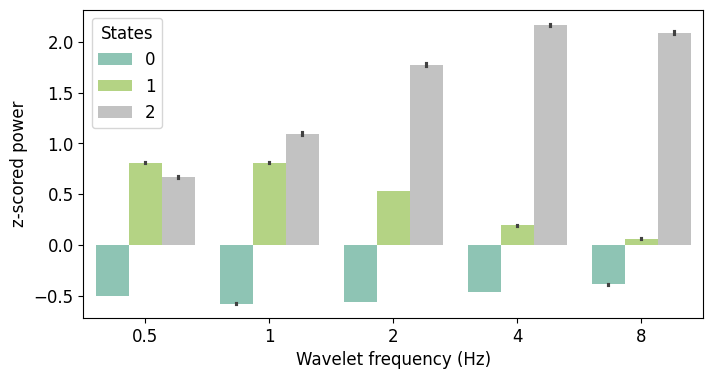

In [47]:
variables = ['avg_wheel_vel0.5', 'avg_wheel_vel1.0', 'avg_wheel_vel2.0', 'avg_wheel_vel4.0', 'avg_wheel_vel8.0']


fig, ax = plt.subplots(figsize=[8, 4])
plt.rc('font', size=12)

sns.barplot(hue='new_states', y='value', x='variable', ax=ax,
                data=wavelet_df.loc[wavelet_df['variable'].isin(variables)], palette=palette, alpha=.8)
plt.xticks([0, 1, 2, 3, 4], [0.5, 1, 2, 4, 8])
plt.xlabel('Wavelet frequency (Hz)')
plt.legend(title='States')
plt.ylabel('z-scored power')
plt.show()

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

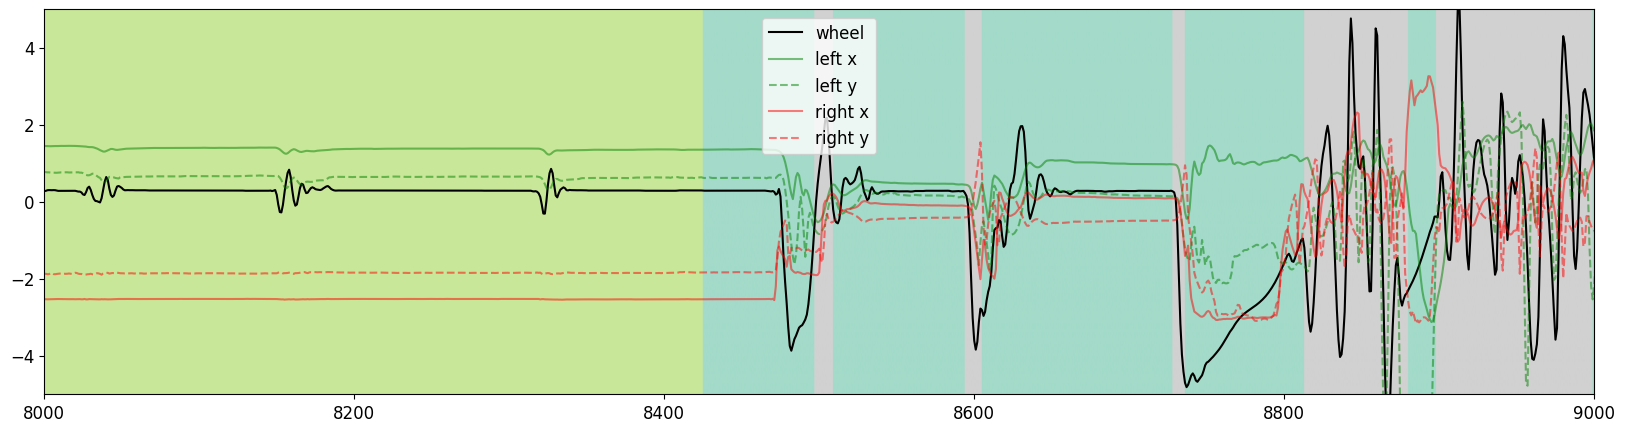

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

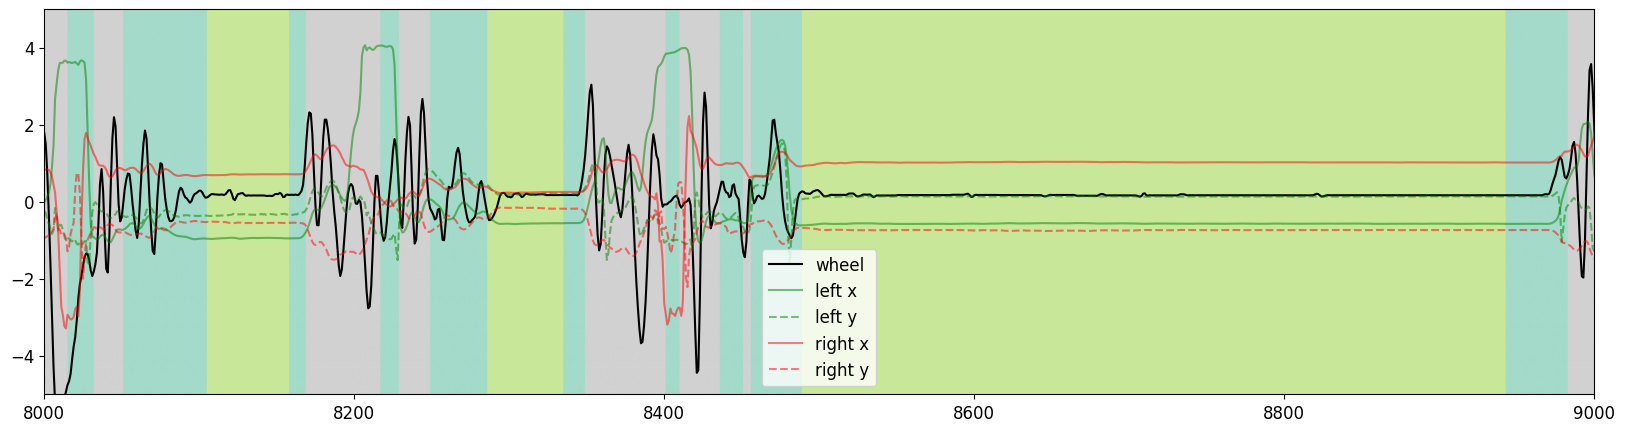

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

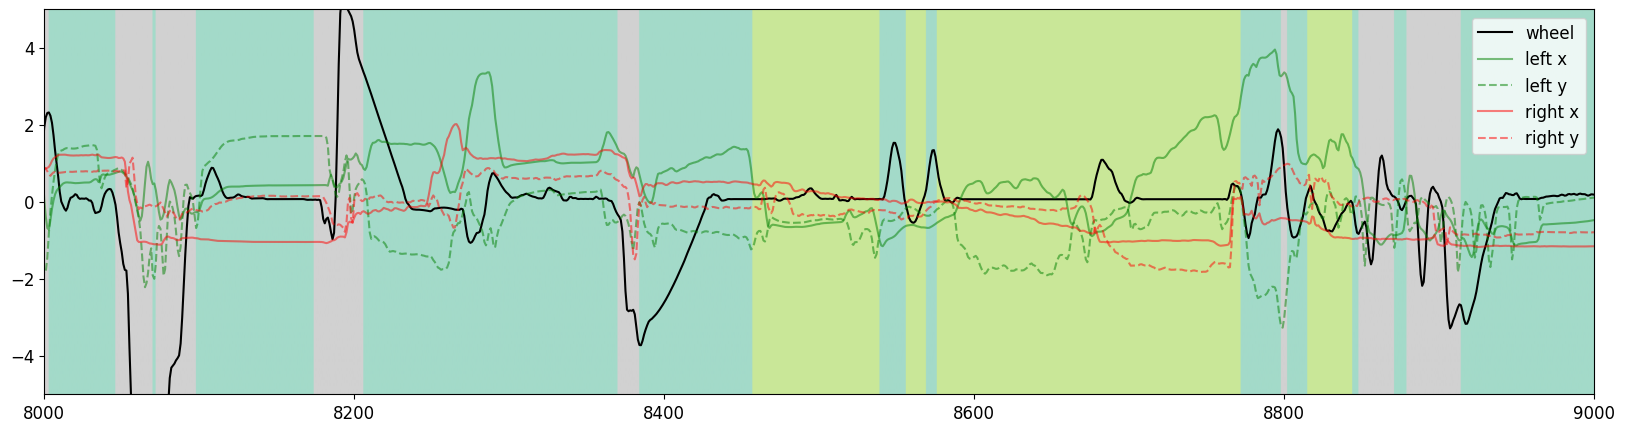

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

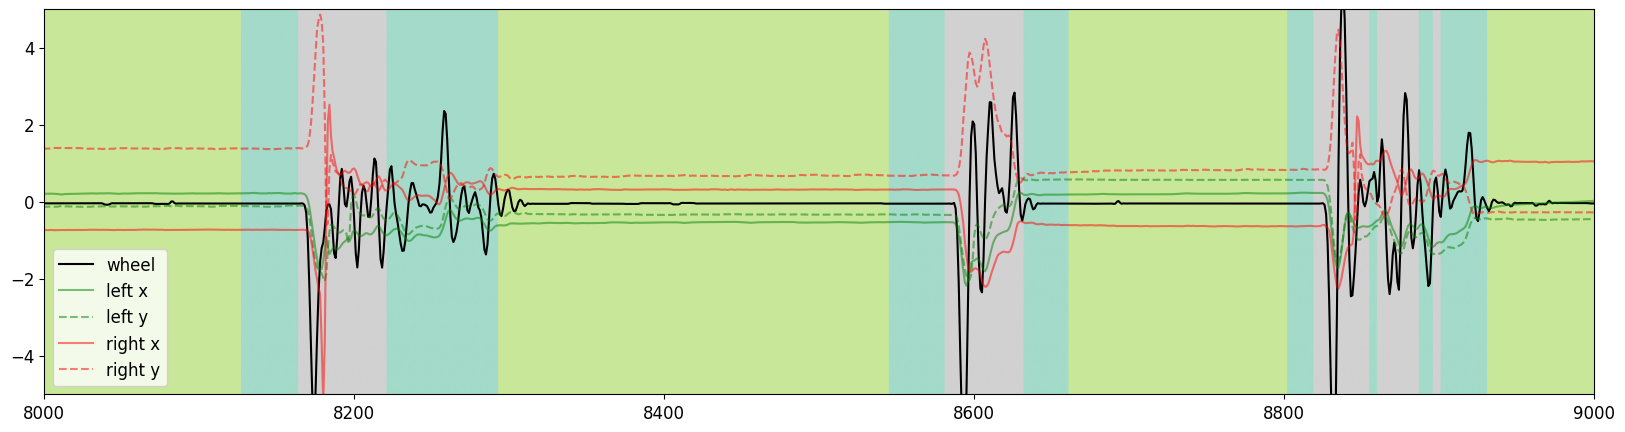

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

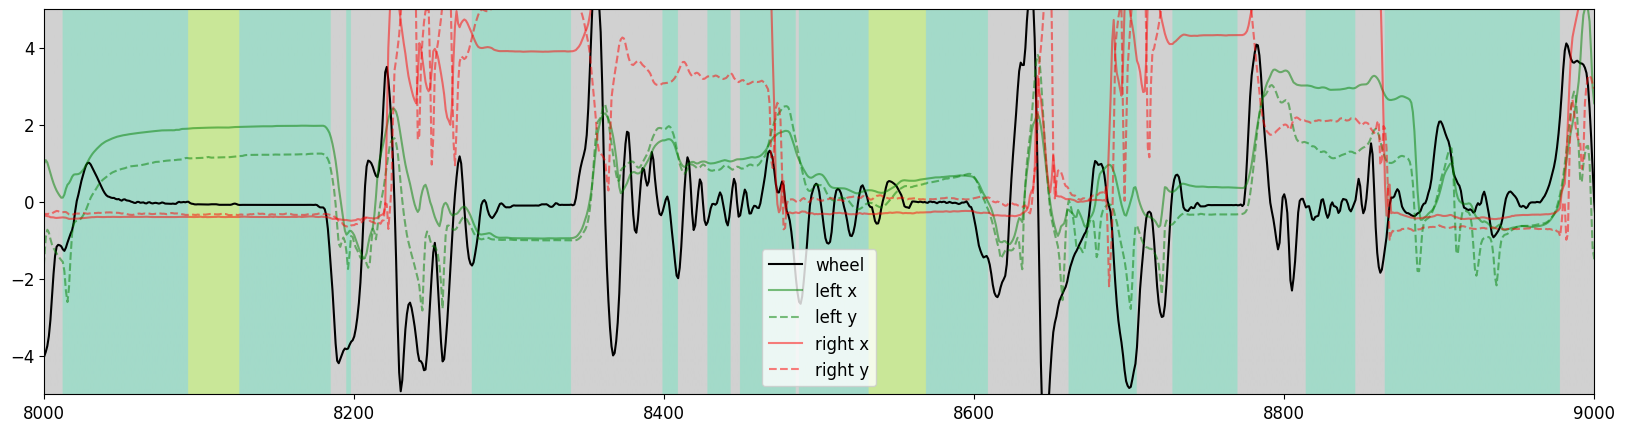

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

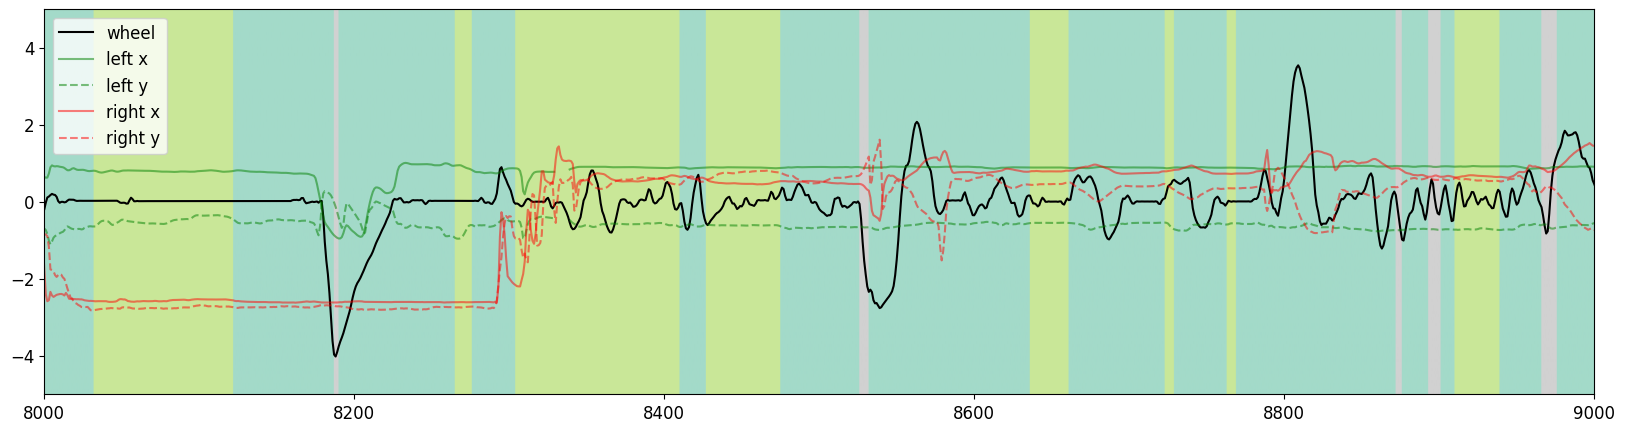

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

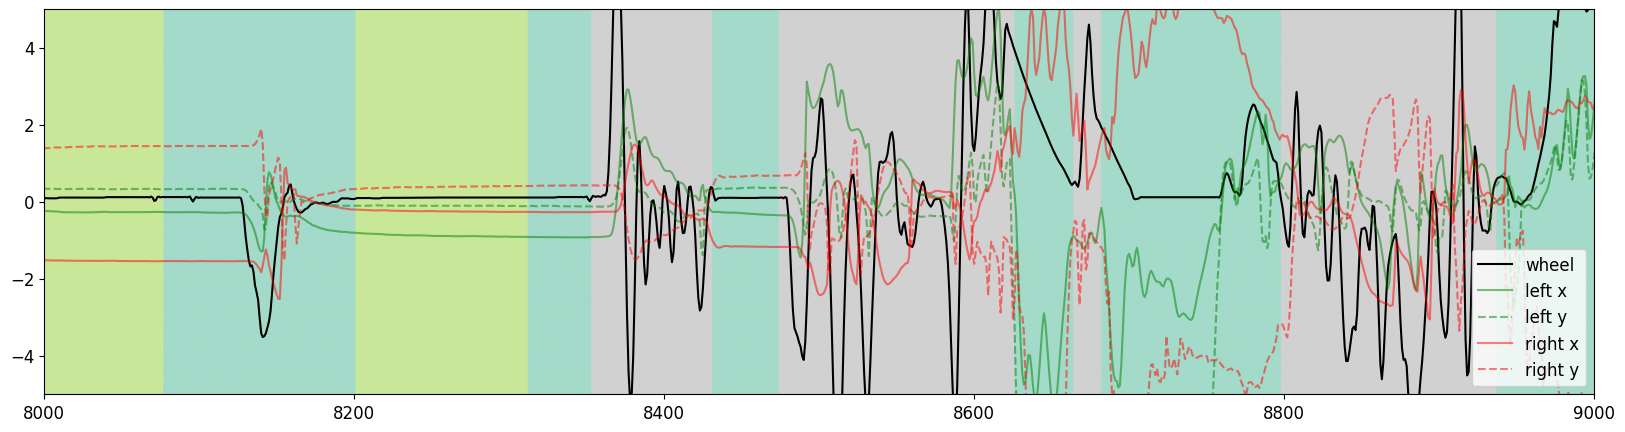

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

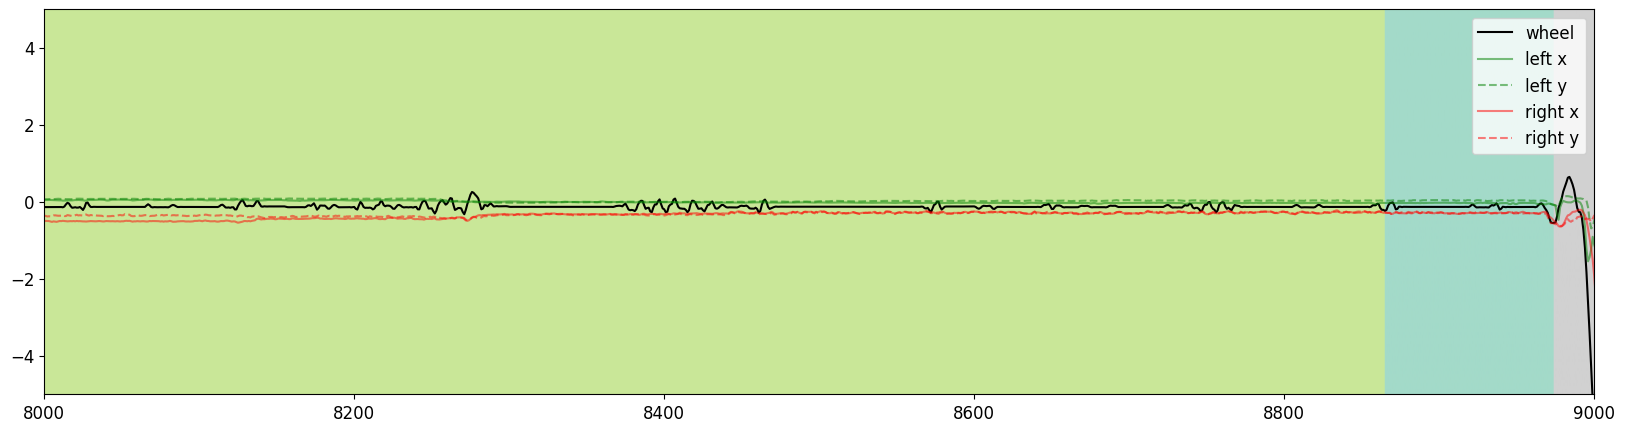

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

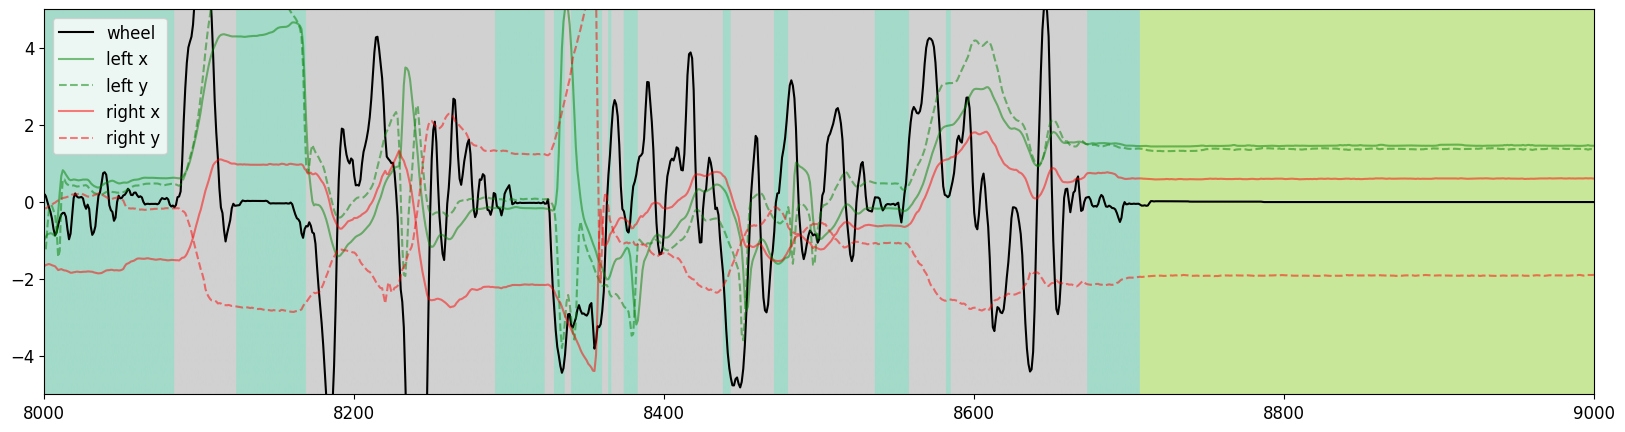

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

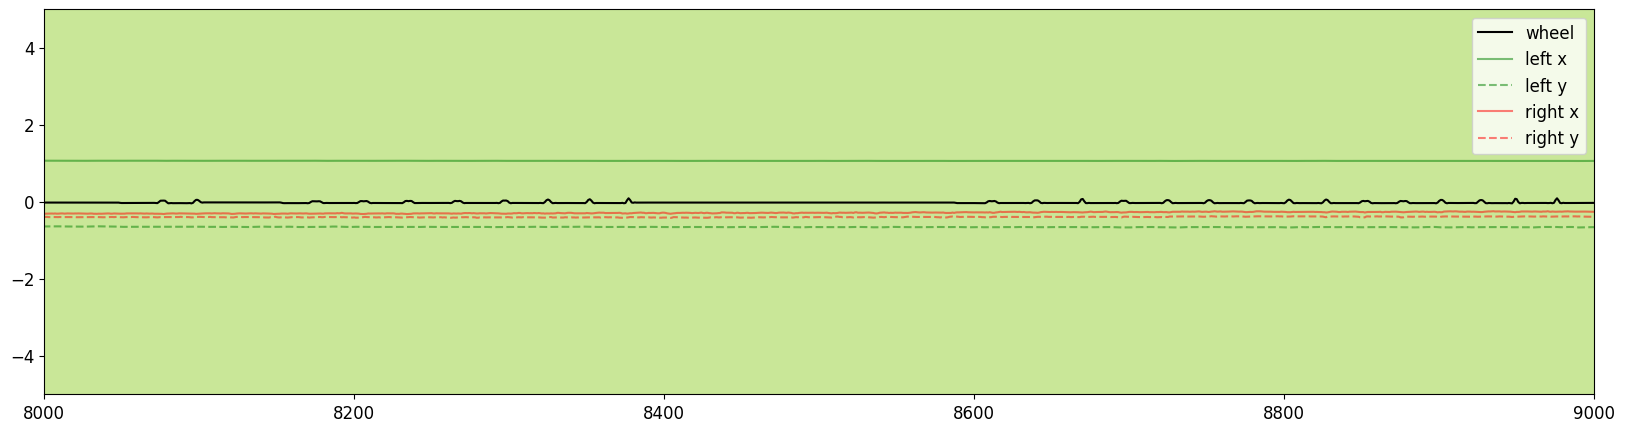

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

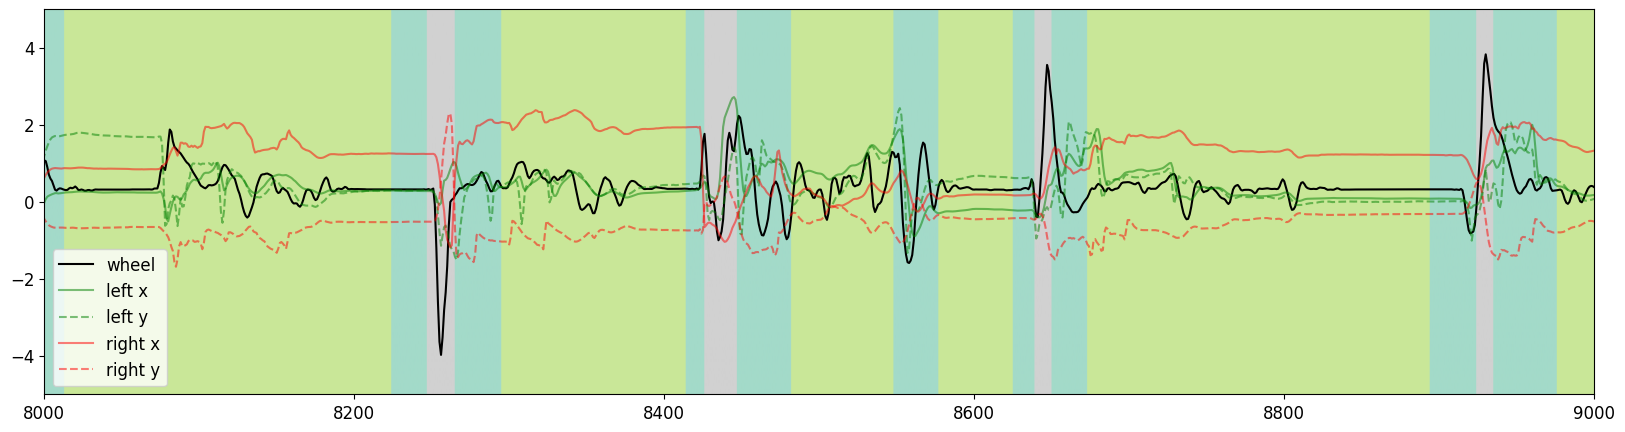

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

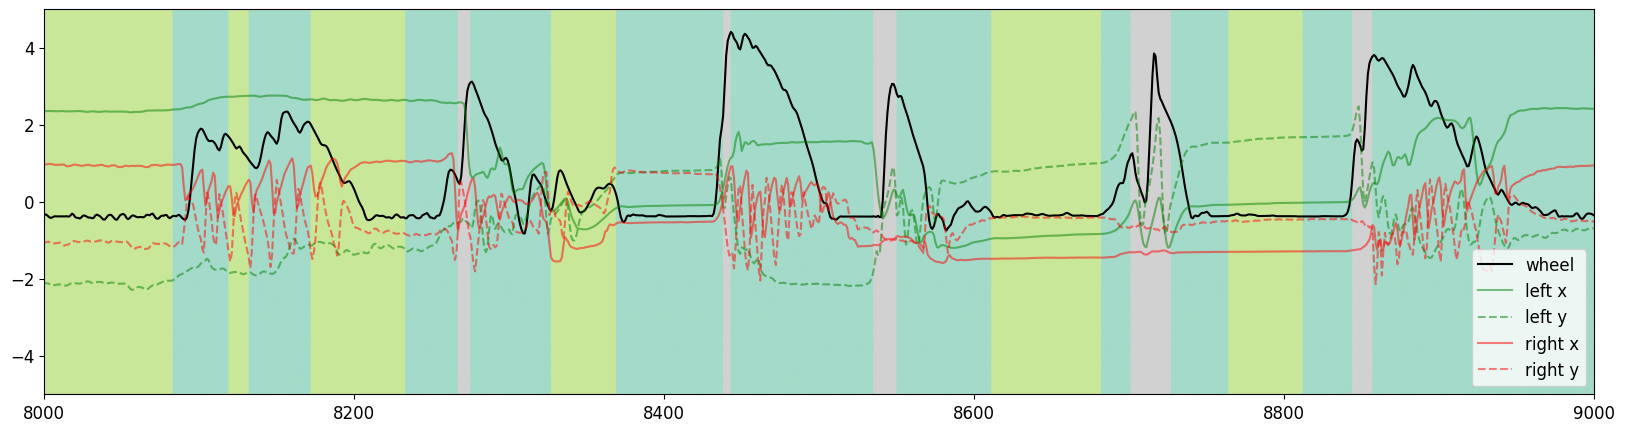

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

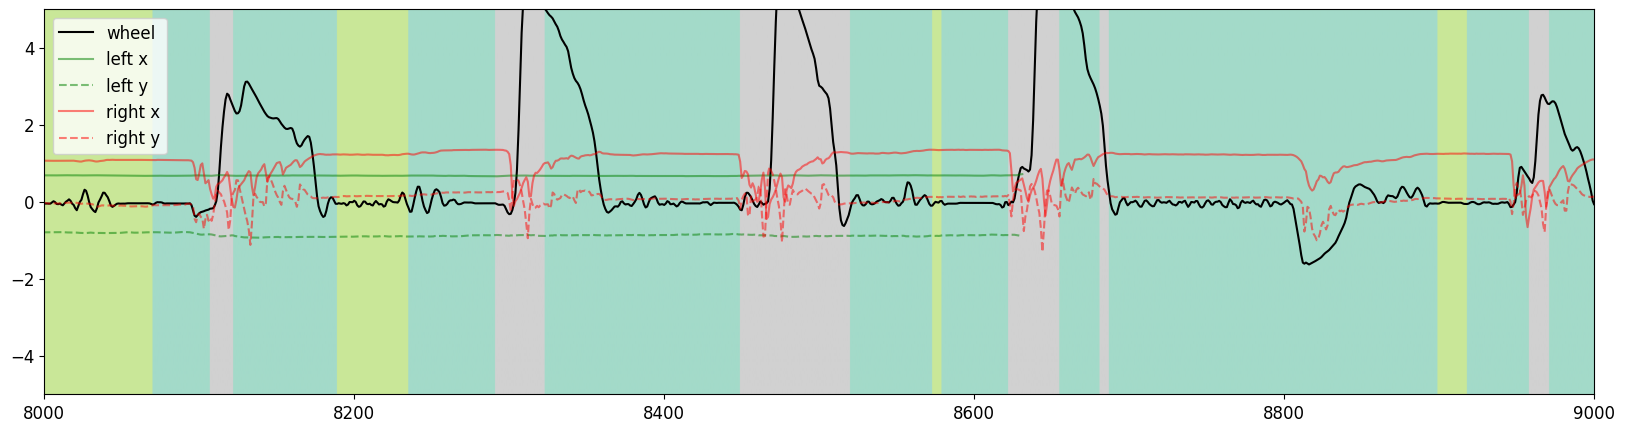

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

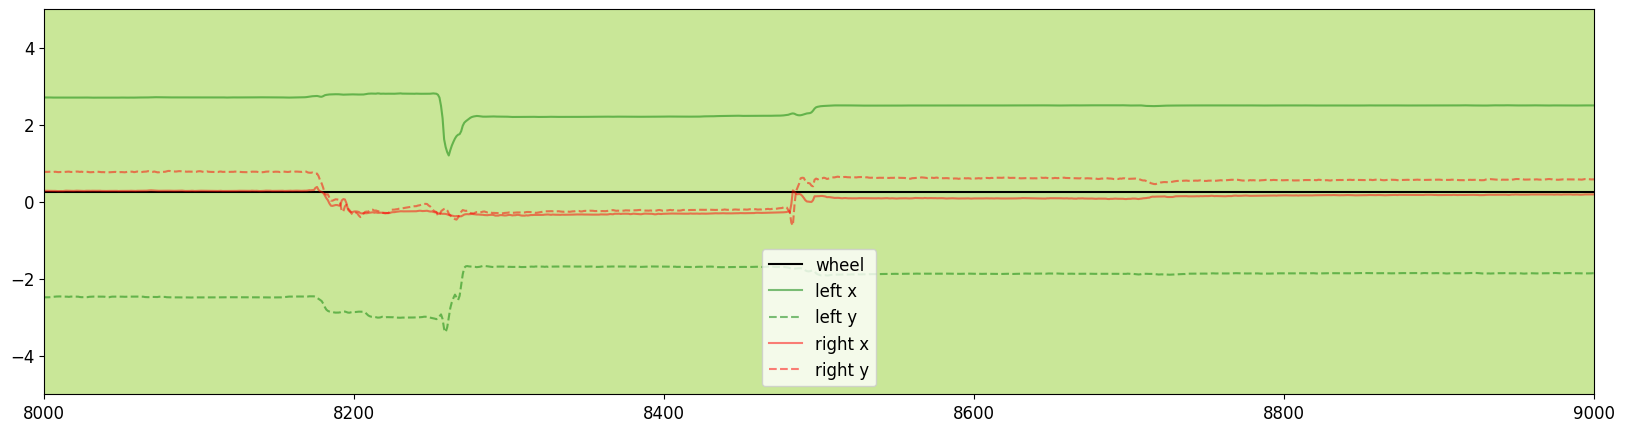

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

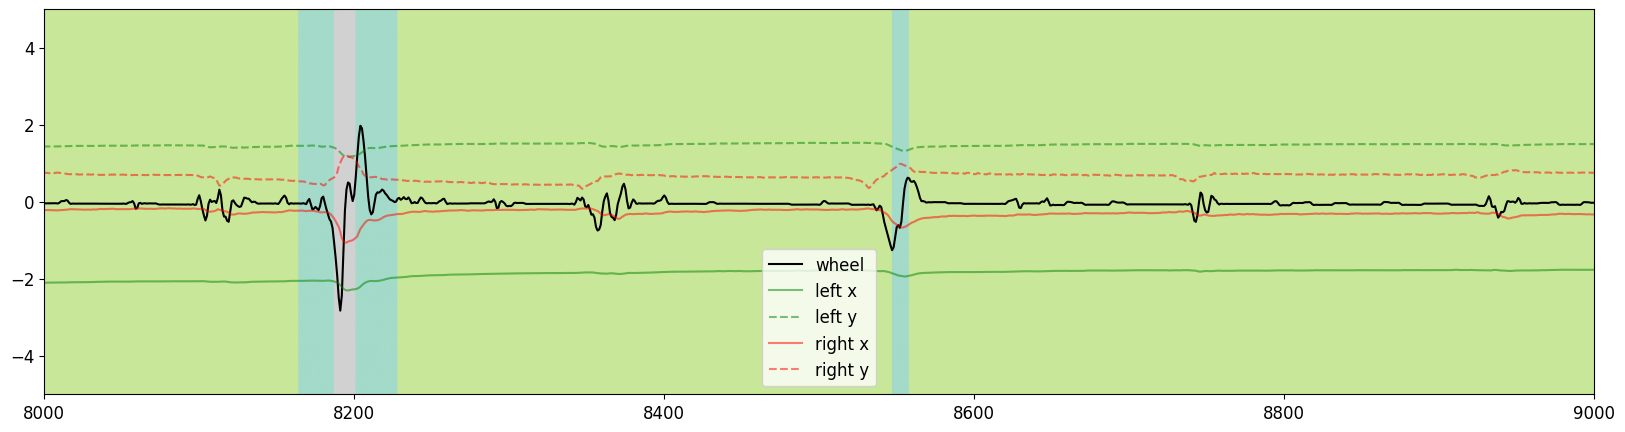

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

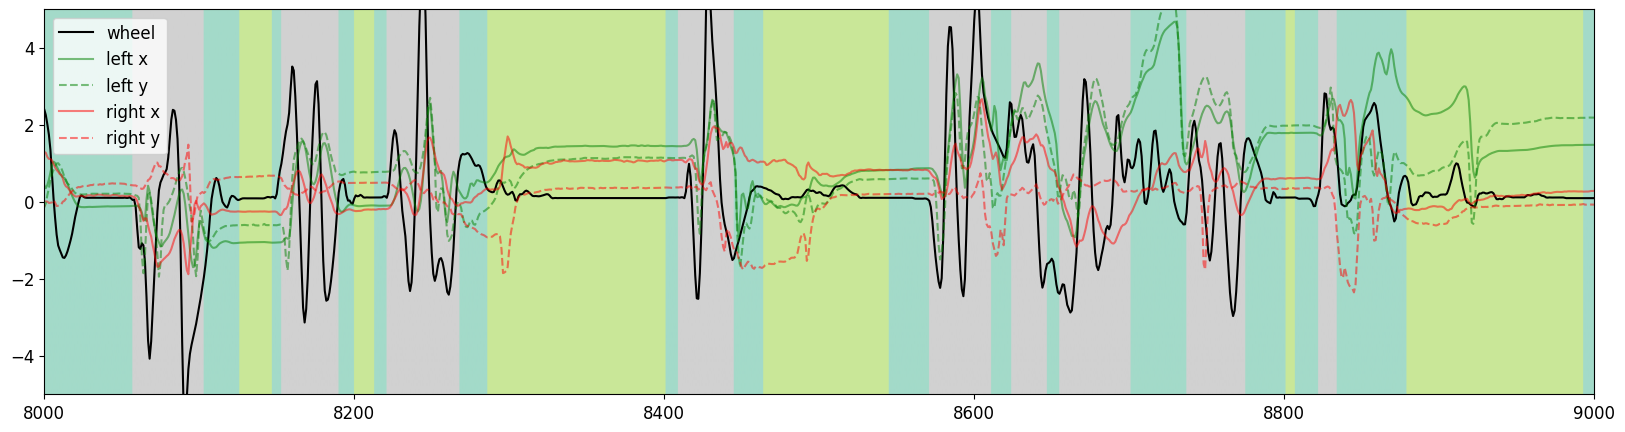

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

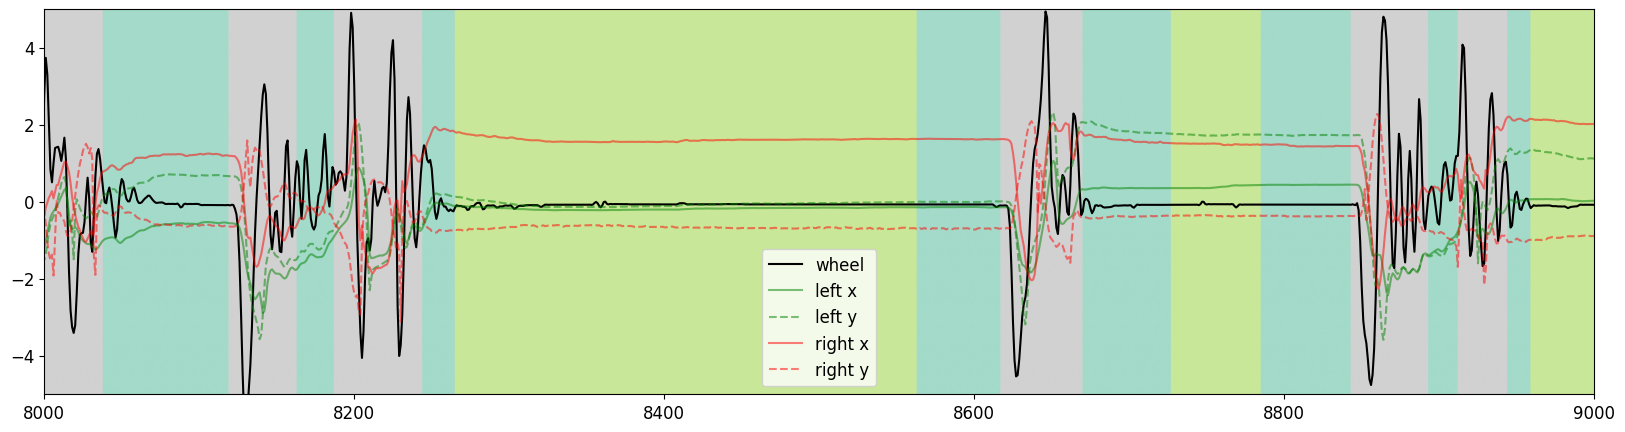

/tmp/ipykernel_33531/1332911653.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix[state_name][not_nan] = new_states
/tmp/ipykernel_33531/1332911653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

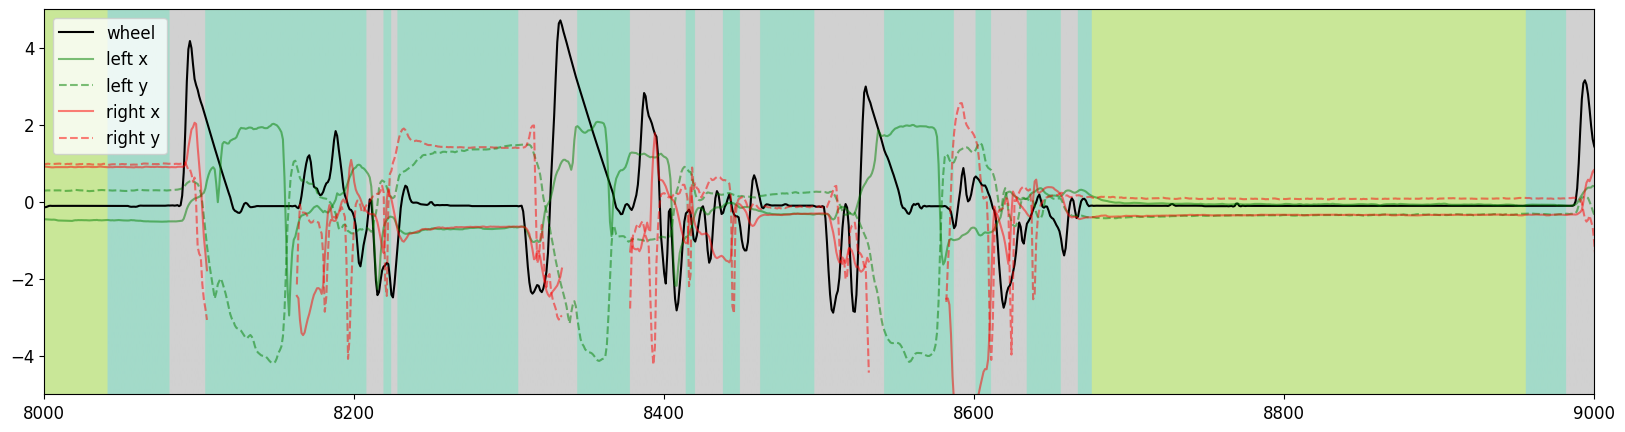

FileNotFoundError: [Errno 2] No such file or directory: '/home/ines/repositories/representation_learning_variability/paper-individuality/data/wheel_wavelets/extra_bwm/wheel_vel_wavelets_c728f6fd-58e2-448d-aefb-a72c637b604c_ibl_witten_27'

In [61]:
palette = sns.color_palette('Set2', n_colors=optimal_k, as_cmap=True)

assert len(sessions_to_process) == 218
for m, mat in enumerate(sessions_to_process):

    mouse_name = mat[0]
    session = mat[1]
        
    filename = wavelet_path + subname + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)

    # Prepare data
    # data_df = design_matrix[var_interest].copy().dropna()
    # data = np.array(data_df)

    var_array = np.array(design_matrix[use_vars].copy())
    not_nan = ~np.isnan(var_array).any(axis=1)
    mouse_data = stats.zscore(var_array[not_nan, :], axis=0, nan_policy='omit')
        
    """ Compute clusters based on supersession centroids """
    # Compute distances between full dataset and trained centroids
    distances = cdist(mouse_data, centroids, metric='euclidean')
    # Assign each point to the nearest centroid
    states = np.argmin(distances, axis=1)
    # replace_func = np.vectorize(paw_mapping.get)
    # new_states = replace_func(states)
    new_states = states
    design_matrix[state_name] = np.nan
    design_matrix[state_name][not_nan] = new_states
    
    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[20, 5])
    plt.rc('font', size=12)
    init = 000
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'avg_wheel_vel'].reset_index()['avg_wheel_vel'], nan_policy='omit'), color='black', label='wheel')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), alpha=.5, color='green', label='left x')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), alpha=.5, linestyle='--', color='green', label='left y')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), alpha=.5, color='red', label='right x')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), alpha=.5, linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, optimal_k, 1)
    ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, state_name]])[None,:],
                extent=(0, len(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, state_name]])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    init=8000
    plt.xlim([init, init+1000])
    plt.ylim([-5, 5])
    plt.legend()
    plt.show()
    # plt.hist(states)
    # plt.show()

# Paw wavelets

In [46]:
fix_mapping = {0: 4,
        1:0,
        2:3,
        3:1,
        4:6,
        5:7,
        6:2,
        7:5
        }  # for z-scored t-SNE
fix_mapping = {0: 4,
        1:1,
        2:5,
        3:7,
        4:6,
        5:2,
        6:0,
        7:3
        }


replace_func = np.vectorize(fix_mapping.get)
wavelet_df['Paw syllables'] = replace_func(wavelet_df['paw_states'])

In [ ]:
palette=sns.color_palette('Set2', 8)

: 

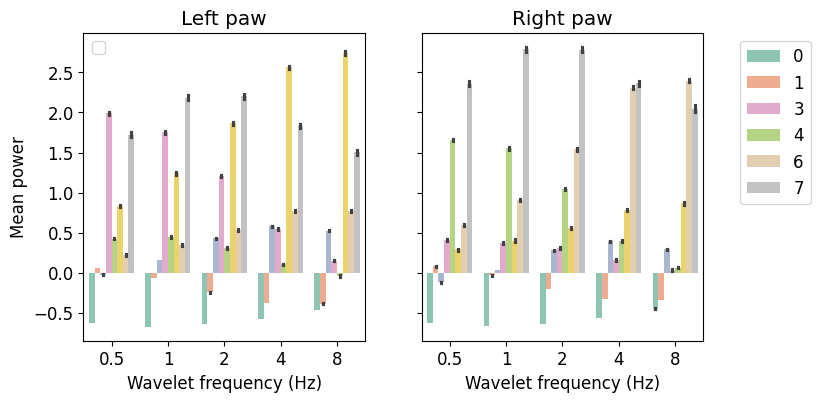

In [47]:
x_left = ['l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0']
x_right = ['r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0']

fig, ax = plt.subplots(ncols=2 , nrows=1, sharex=False, sharey=True, figsize=[8, 4])
plt.rc('font', size=12)
use_states = 'Paw syllables'
# use_states = 'paw_states'
sns.barplot(hue=use_states, y='value', x='variable', ax=ax[0],
                data=wavelet_df.loc[wavelet_df['variable'].isin(x_left)], palette=palette, alpha=.8)
ax[0].set_title('Left paw')
sns.barplot(hue=use_states, y='value', x='variable', ax=ax[1],
                data=wavelet_df.loc[wavelet_df['variable'].isin(x_right)], palette=palette, alpha=.8)
ax[0].set_xlabel('Wavelet frequency (Hz)')
ax[1].set_xlabel('Wavelet frequency (Hz)')
ax[1].set_title('Right paw')
ax[0].set_ylabel('Mean power')
ax[0].set_xticks([0, 1, 2, 3, 4], [0.5, 1, 2, 4, 8])
ax[1].set_xticks([0, 1, 2, 3, 4], [0.5, 1, 2, 4, 8])
ax[0].legend('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

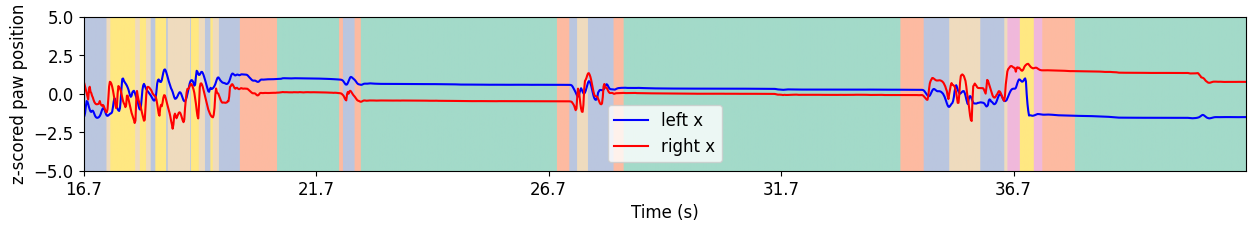

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

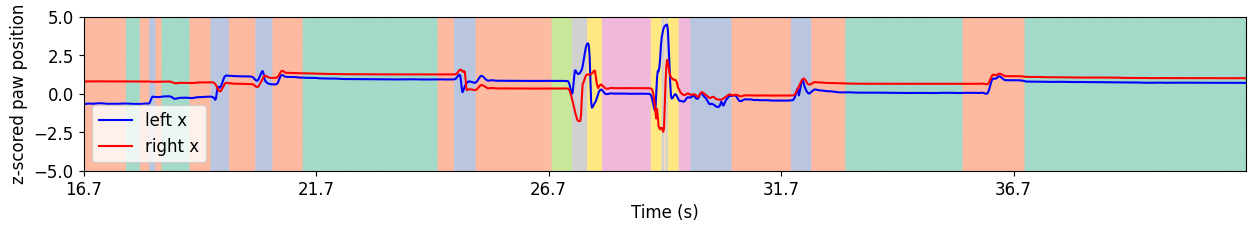

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

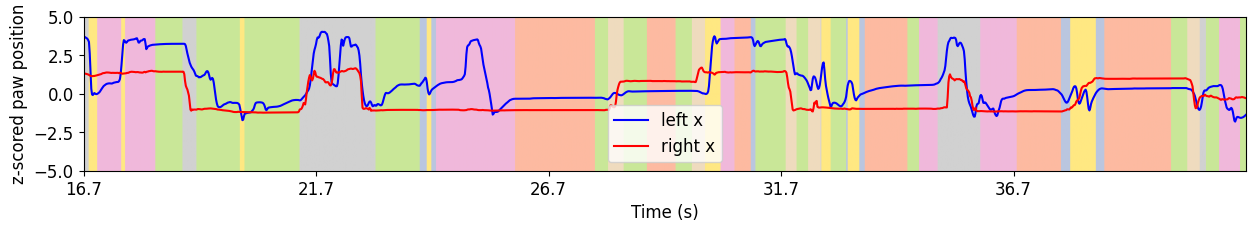

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

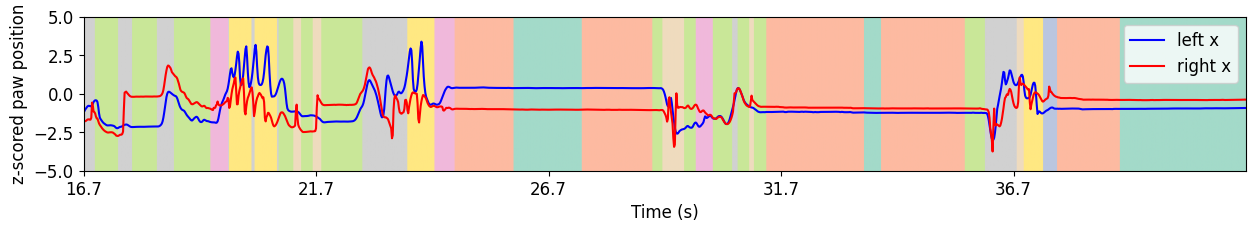

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

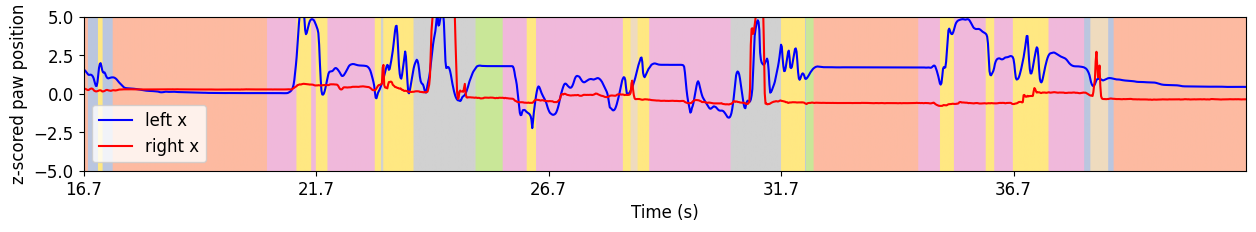

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

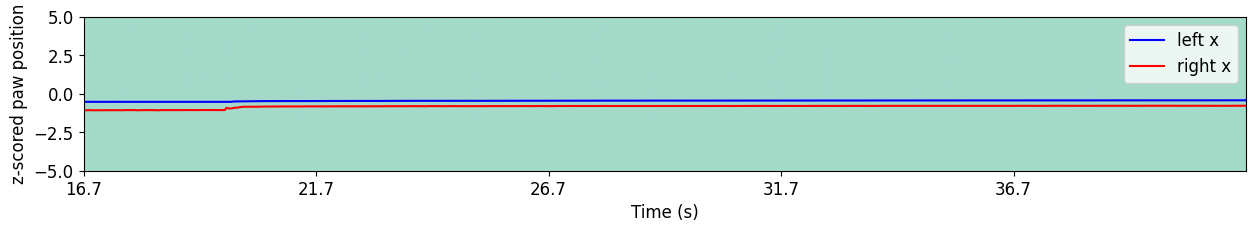

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

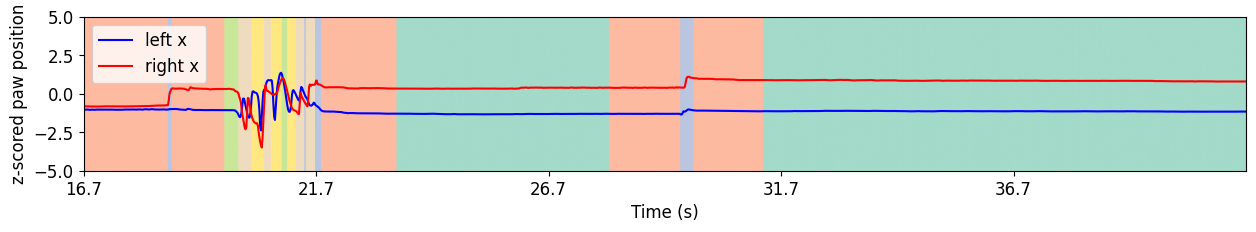

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

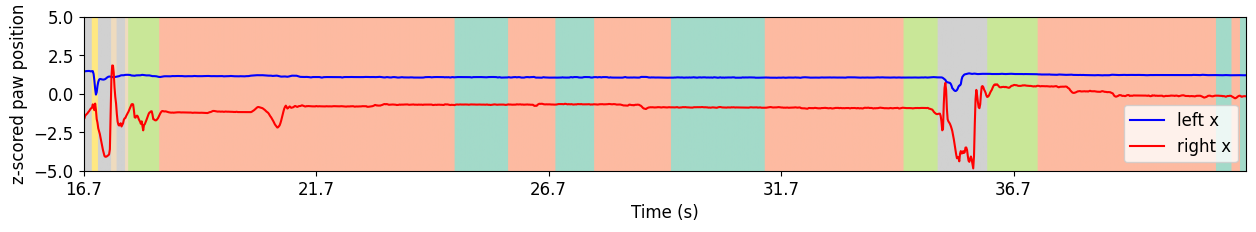

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

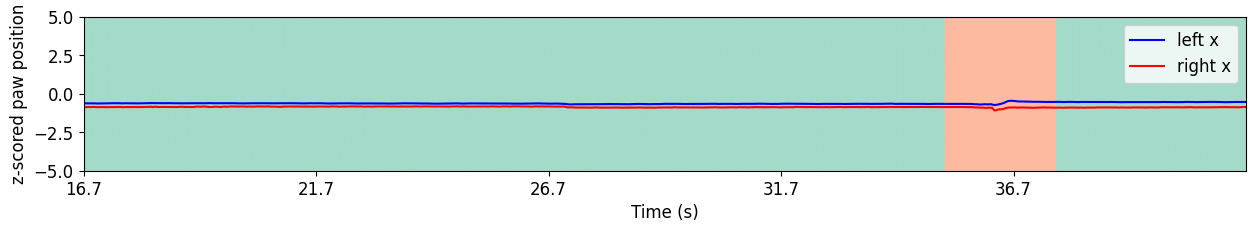

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

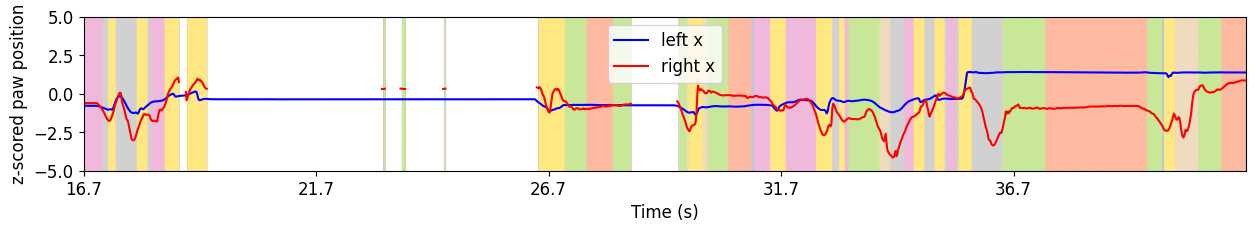

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

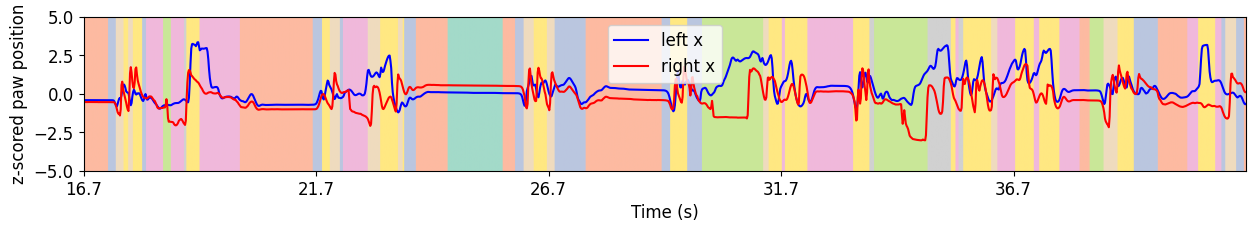

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

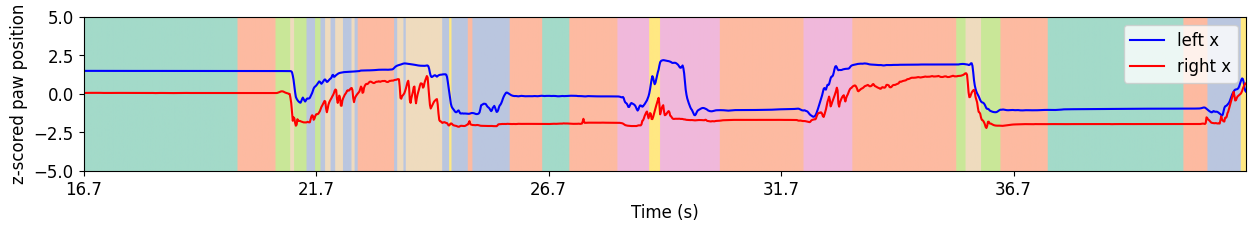

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

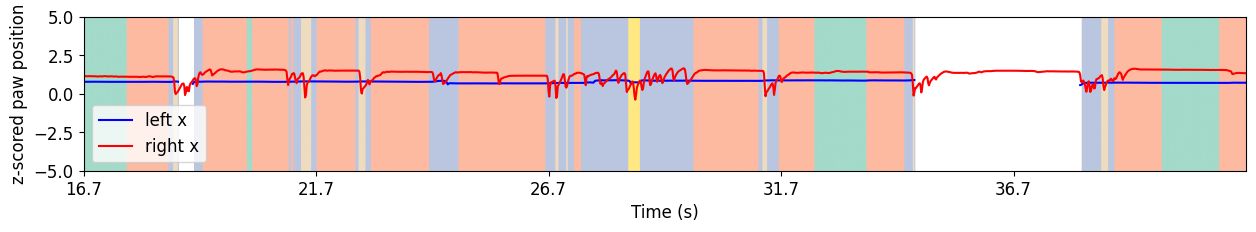

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

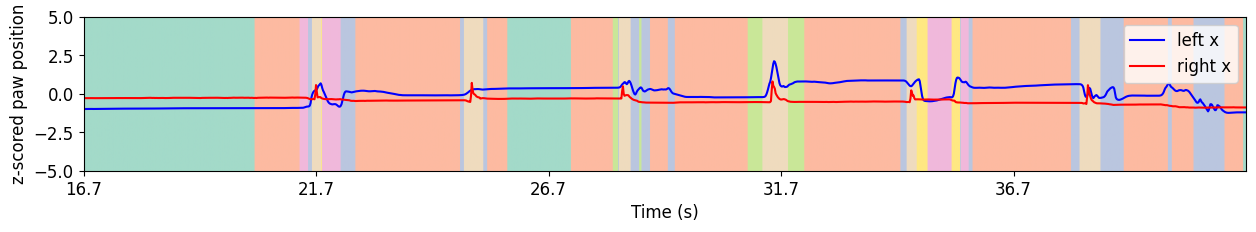

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

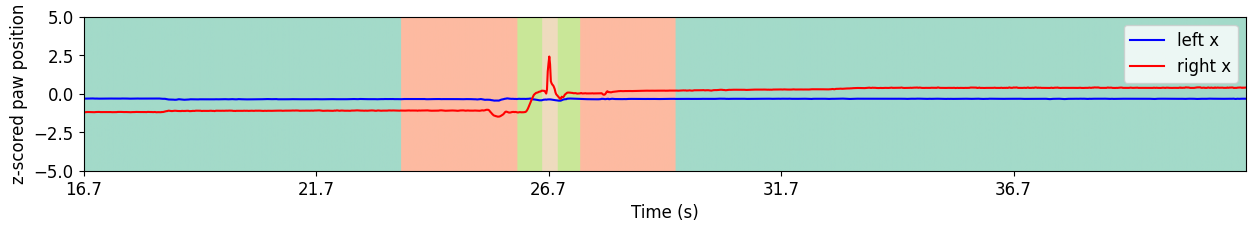

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

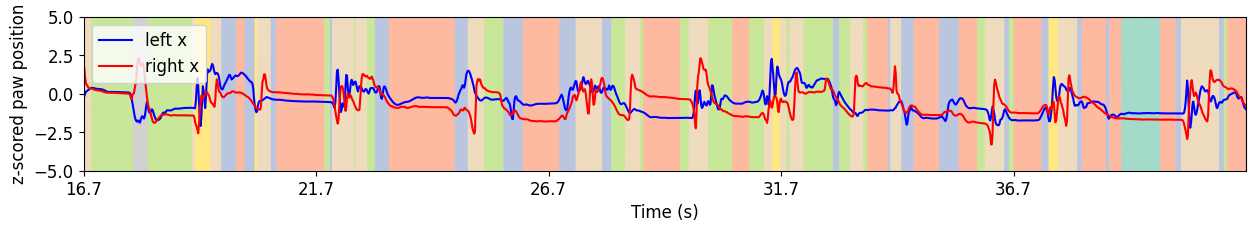

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

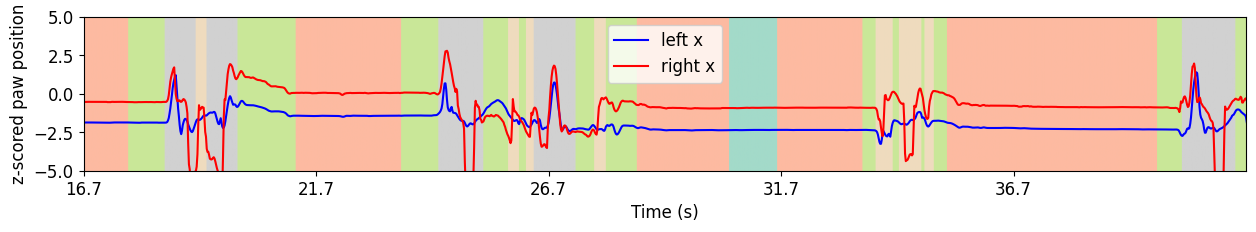

/tmp/ipykernel_86048/2011018153.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan] = new_states
/tmp/ipykernel_86048/2011018153.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

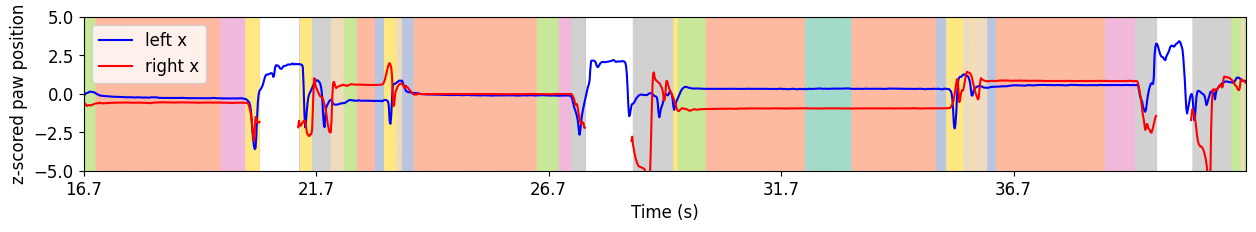

FileNotFoundError: [Errno 2] No such file or directory: '/home/ines/repositories/representation_learning_variability/paper-individuality/data/paw_wavelets/extra_bwm/paw_vel_wavelets_c728f6fd-58e2-448d-aefb-a72c637b604c_ibl_witten_27'

In [48]:
palette = sns.color_palette('Set2', n_colors=optimal_k, as_cmap=True)
if velocity:
    subname = "paw_vel_wavelets_"
else:
    subname = "paw_pos_wavelets_"

super_session =  np.array(df[use_vars])
supersession_mean = np.nanmean(super_session, axis=0)
supersession_std = np.nanstd(super_session, axis=0)

# assert len(sessions_to_process) == 218
for m, mat in enumerate(sessions_to_process):

    mouse_name = mat[0]
    session = mat[1]
    filename = wavelet_path + subname + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)

    # Prepare data
    # data_df = design_matrix[var_interest].copy().dropna()
    # data = np.array(data_df)

    var_array = np.array(design_matrix[use_vars].copy())
    not_nan = ~np.isnan(var_array).any(axis=1)
    mouse_data = stats.zscore(var_array[not_nan, :], axis=0, nan_policy='omit')
    # mouse_data = (var_array[not_nan, :] - supersession_mean)/supersession_std
        
    """ Compute clusters based on supersession centroids """
    # Compute distances between full dataset and trained centroids
    distances = cdist(mouse_data, centroids, metric='euclidean')
    # Assign each point to the nearest centroid
    states = np.argmin(distances, axis=1)
    replace_func = np.vectorize(fix_mapping.get)
    new_states = replace_func(states)
    # new_states = states
    design_matrix['paw_states'] = np.nan
    design_matrix['paw_states'][not_nan] = new_states
    
    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 1000
    # ax.plot(design_matrix.loc[design_matrix['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, optimal_k, 1)
    ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
                extent=(0, len(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    init=1000
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-5, 5])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    plt.legend()
    plt.show()
    # plt.hist(states)
    # plt.show()
    
    
    
    # mouse_data = (var_array[not_nan, :] - supersession_mean)/supersession_std
        
    # """ Compute clusters based on supersession centroids """
    # # Compute distances between full dataset and trained centroids
    # distances = cdist(mouse_data, centroids, metric='euclidean')
    # # Assign each point to the nearest centroid
    # states = np.argmin(distances, axis=1)
    # replace_func = np.vectorize(fix_mapping.get)
    # new_states = replace_func(states)
    # # new_states = states
    # design_matrix['paw_states'] = np.nan
    # design_matrix['paw_states'][not_nan] = new_states
    
    # fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    # plt.rc('font', size=12)
    # init = 1000
    # # ax.plot(design_matrix.loc[design_matrix['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='green', label='left x')
    # # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    # attach_array = np.arange(0, optimal_k, 1)
    # ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
    #             extent=(0, len(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
    #             aspect="auto",
    #             alpha=0.6,
    #             cmap=palette)  # 
    # init=1000
    # plt.xlim([init, init+1500])
    # plt.ylabel('z-scored paw position')
    # plt.xlabel('Time (s)')
    # plt.ylim([-5, 5])
    # inter = 1500
    # frame_rate = 60
    # plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
    #               (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    # plt.legend()
    # plt.show()
    # # plt.hist(states)
    # # plt.show()